In [1]:
from tensorflow import keras

In [2]:
model = keras.models.load_model('./logs/best/model.h5')

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sn

In [4]:
from utils.utils import DataGenerator

train, valid = DataGenerator()

Found 1805 images belonging to 4 classes.
Found 365 images belonging to 4 classes.


In [5]:
valid.batch_size = 365

In [6]:
val_data = valid.next()

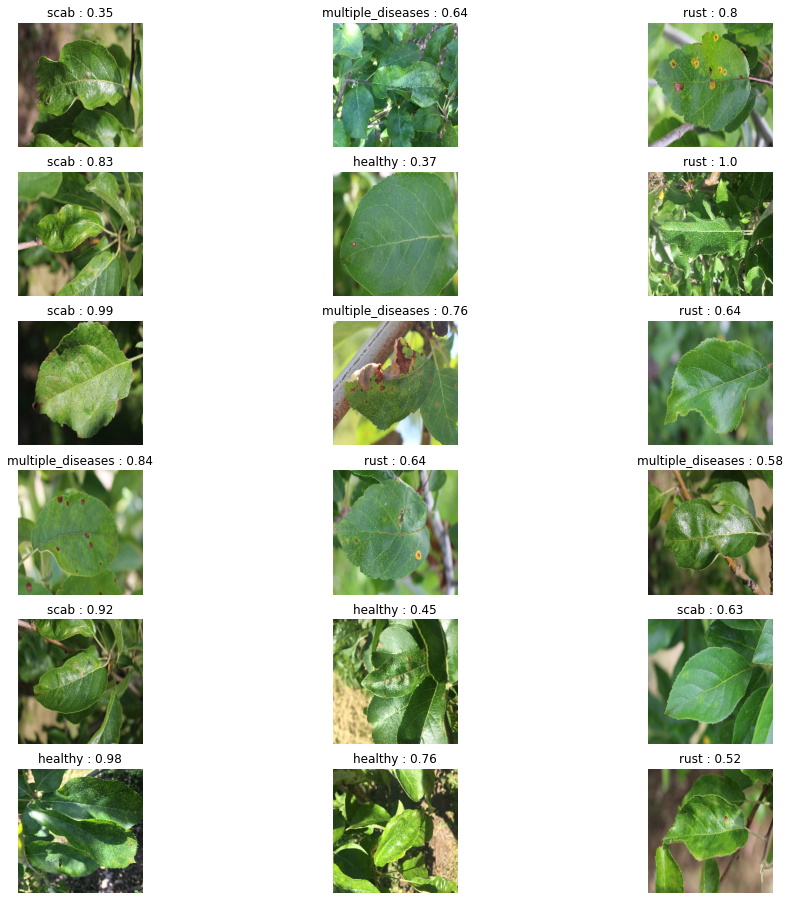

In [7]:
fig = plt.figure(figsize=(16, 16))
rows = 6
cols = 3

class_list = ['healthy', 'multiple_diseases', 'rust', 'scab']

for idx, img in enumerate(val_data[0][val_data[1][:, 1]==1]): 
    
    ax = fig.add_subplot(rows, cols, idx+1)
    ax.imshow(img)
    predict = model.predict(np.expand_dims(img, axis=0))
    prob = round(predict.max(), 2)
    plt.title(f"{class_list[predict.argmax()]} : {str(prob)}")
    ax.axis("off")
plt.show()

<AxesSubplot:>

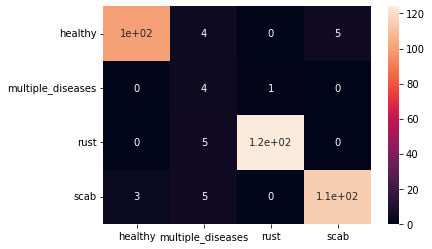

In [9]:
con = confusion_matrix(model.predict(val_data[0]).argmax(axis = 1), val_data[1].argmax(axis = 1))
sn.heatmap(con, annot = True, xticklabels=class_list, yticklabels=class_list)